<a href="https://colab.research.google.com/github/manasareddy1999/Portfolio/blob/main/hotel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Researh question
1.What are the variables that affect hotel reservations cacellations?
2. How can we make hotel reservartion  cancellation better?
3.How will hotels be assisted in making pricing and promotions?

# Hypothesis
1.More cancellations occur when prices are higher

2.when there is a longer waiting list,customers tend to cancel more frequently

3.the majority of clients are coming from office travel agents to make their reservations

In [ ]:
 #Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/hotel_bookings 2.csv')

#Exploratory Data analysis and Data cleaning

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.dtypes#describe the data types of columns

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
#convert to date time format
df['reservation_status_date']=  pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['company','agent'] ,axis =1,inplace= True) #dropping the columns having more null values
df.dropna(inplace=True)#to drop null values


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df=df[df['adr']<5000]# because we have only one value above 5000

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


#Data Analysis and visualizations

In [ ]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


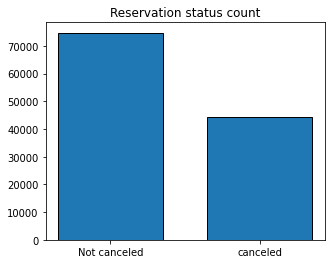

In [ ]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(),edgecolor='k',width =0.7)
plt.show()

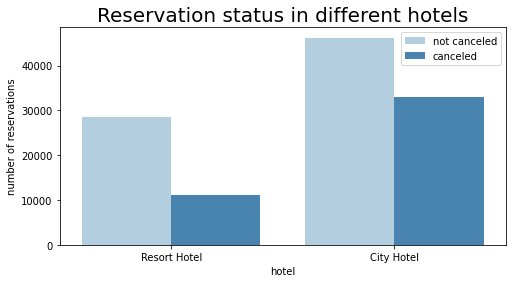

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data= df , palette = 'Blues')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [ ]:
s = pd.Series(['race','gender'],index=[311,317])

In [ ]:
i=df[df['hotel']=='Resort Hotel']

In [ ]:
i['is_canceled'].value_counts(normalize =True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
c=df[df['hotel']=='City Hotel']


In [ ]:
c['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [ ]:
resort_hotel= i.groupby('reservation_status_date')[['adr']].mean()
city_hotel=c.groupby('reservation_status_date')[['adr']].mean()

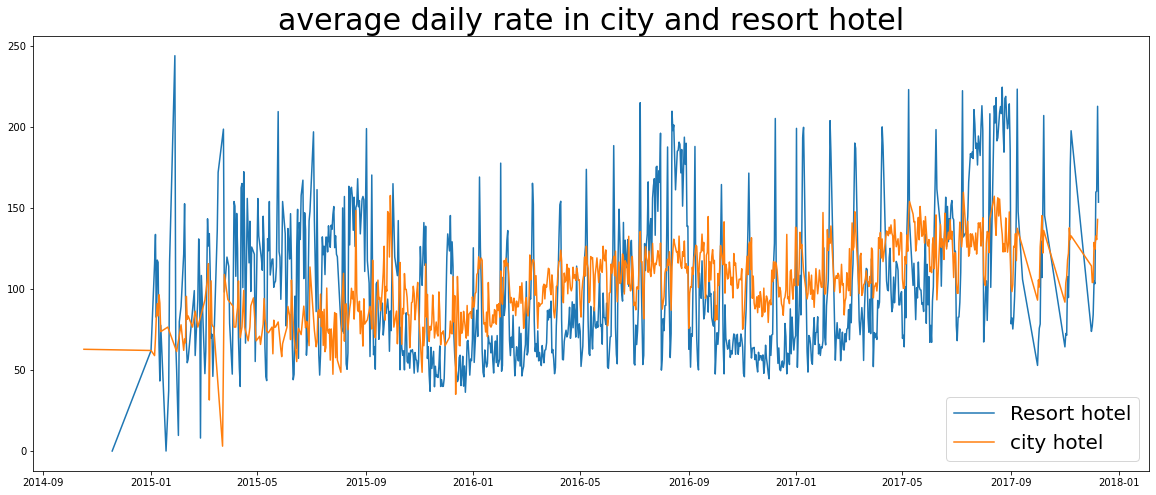

In [ ]:
plt.figure(figsize=(20,8))
plt.title('average daily rate in city and resort hotel',fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city hotel')
plt.legend(fontsize=20)
plt.show()


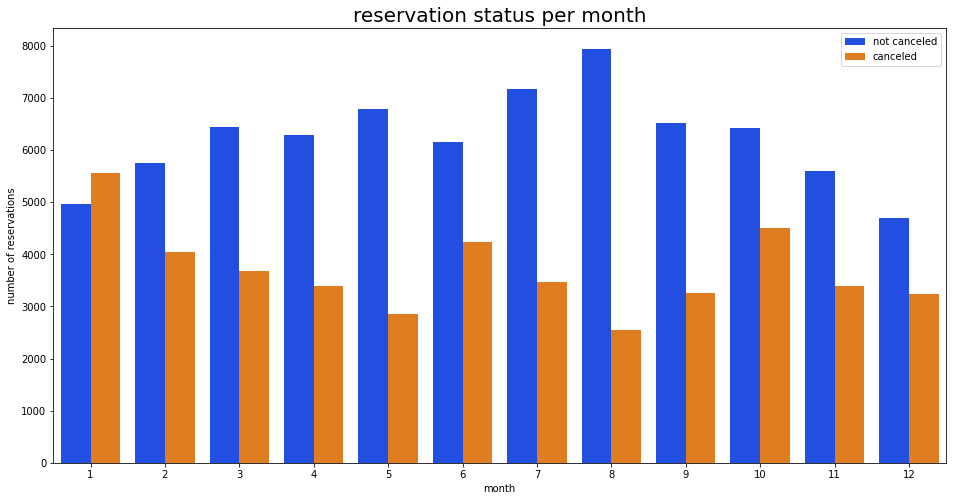

In [ ]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette = 'bright')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()
#jan has more canceled reservations and aug has less
#reservations are more in aug 

In [ ]:
data1= df[df['is_canceled']==1].groupby('month')[['adr']].sum()

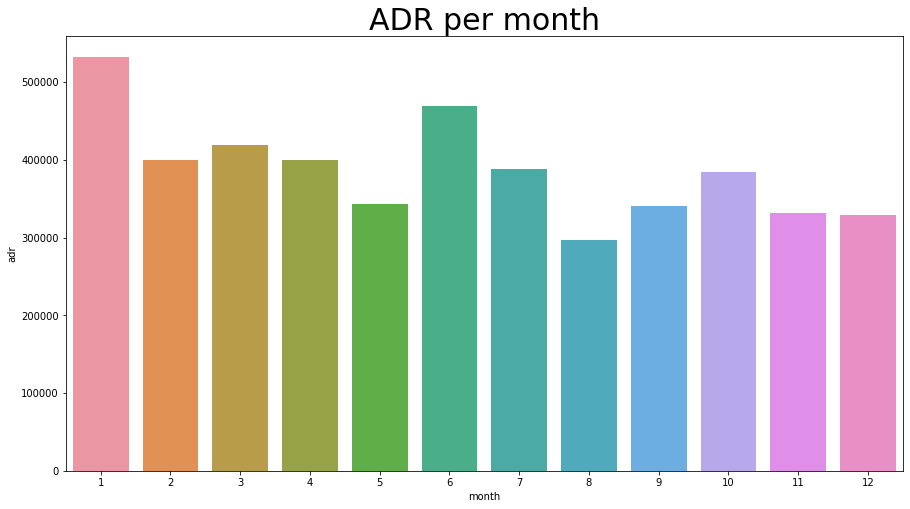

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize =30)# as we can see higher price canceletion is higher
sns.barplot(x='month',y='adr',data= data1.reset_index())
plt.show()

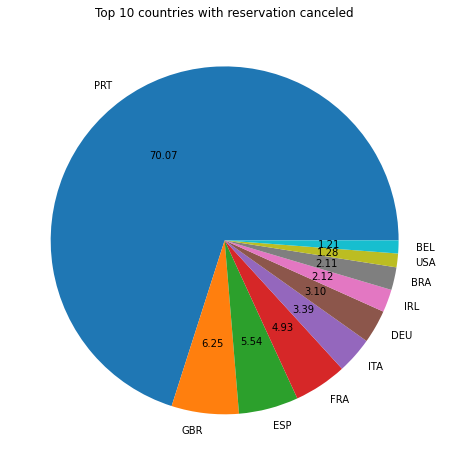

In [ ]:
cancelled_data =df[df['is_canceled']==1]
top_10country= cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10country, autopct ='%.2f',labels= top_10country.index)
plt.show()

in above pie chart we can see porchugal has more cancellation
so porchugal should incerse their facities
hegine ,discounts,marketing giving ads
to increse thier reservations

In [ ]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In hypothises it was given offline more compare to online 
but here we can see  offline less than online

In [ ]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

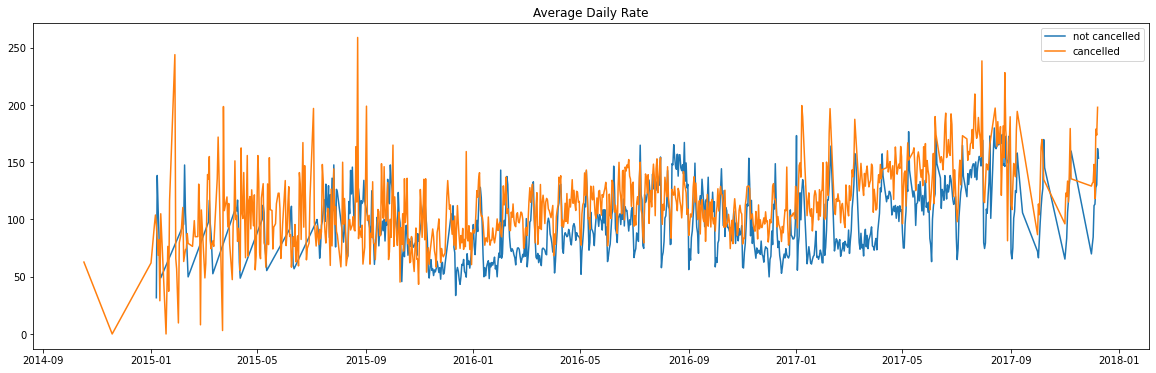

In [ ]:
cancelled_df_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label= 'cancelled')
plt.legend()


In [ ]:
cancelled_df_adr  = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')&(cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016')&(not_cancelled_df_adr['reservation_status_date']<'2017-09')]

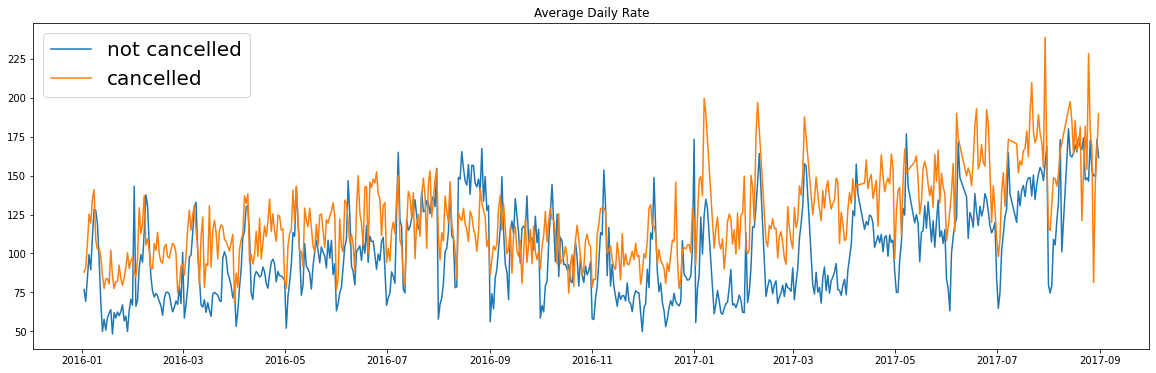

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label= 'cancelled')
plt.legend(fontsize=20)
